Problem Statement

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

To understand how to approach this problem using data science, let’s first understand the payment process at Schuster now. Every time a transaction of goods takes place with a vendor, the accounting team raises an invoice and shares it with the vendor. This invoice contains the details of the goods, the invoice value, the creation date and the payment due date based on the credit terms as per the contract. Business with these vendors occurs quite frequently. Hence, there are always multiple invoices associated with each vendor at any given time.

Business Objective

Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

STEPS INVOLVED

1. Data reading and understanding
2. Data preparation 
3. EDA
4. Feature engineering
5. Customer segmentation
6. Data preparation (train-test split, feature scaling)
7. Model building

   Logistic regression
   - finding optimal cut off point, 
   - ploting ROC curve, 
   - making predictions on the test set
   
   Random forest
   - hyperparameter tuning, 
   - checking feature importance)
8. Preparing open invoice dataset for prediction
9. Final prediction based on random forest model
10. Recommendations

In [1]:
# Importing required lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Received Payment Data

# Step 1: Reading and Understanding the data

In [2]:
rp_data = pd.read_csv('Received_Payments_Data.csv')
rp_data.head(10)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
5,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000040,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
6,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
7,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
8,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
9,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
#checking dimensions of the dataframe
rp_data.shape

(93937, 16)

In [4]:
# checking the type of each column
rp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [5]:
# cheking  statistical aspects of the dataframe
rp_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


# Step 2: Data Preparation and cleaning

In [6]:
# checking number of unique values in each column
rp_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

### 1) Dealing with null values

In [7]:
# Checking the number of missing values in each column
rp_data.isnull().sum().sort_values(ascending=False)

RECEIPT_DOC_NO           29
RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

Note: Dropping the "RECEIPT_DOC_NO" column as it is not important for model building.

In [8]:
# Dropping the "RECEIPT_DOC_NO" column
rp_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

# Checking the head of data again
rp_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


### 2. datetime conversion

In [9]:
# Changing the date related columns to pandas datatime object

rp_data['RECEIPT_DATE'] = pd.to_datetime(rp_data['RECEIPT_DATE'])
rp_data['INVOICE_CREATION_DATE'] = pd.to_datetime(rp_data['INVOICE_CREATION_DATE'])
rp_data['DUE_DATE'] = pd.to_datetime(rp_data['DUE_DATE'])

In [10]:
#checking the type of each column again to confirm if the changes are made
rp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

### 3. Since we are dealing with data related to payments received, you have to ignore any observation where the invoice value is less than 0. 

In [11]:
# Checking the number of bills with Local Amount equal to 0
rp_data[rp_data['Local Amount'] == 0].shape

(1126, 15)

Note: 1126 bills have amount equal to 0, hence dropping these rows.

In [12]:
# Dropping the rows with 'Local Amount' = 0
rp_data = rp_data[rp_data['Local Amount'] > 0]

# Checking the shape again to confirm if the changes are made
rp_data.shape

(92811, 15)

### 4. Creating the target column 'default' based on the late bill payment.

Note: Your target variable is whether the payment against an invoice was made on time or late. As explained above, you can derive this by checking whether the payment receipt date falls before or after the due date. By doing so, you can create your binary target variable as 1 or 0.

In [13]:
rp_data['default'] = (rp_data["RECEIPT_DATE"] > rp_data["DUE_DATE"]).astype(int)

In [14]:
# Checking the count of defaulted bill payments
rp_data.default.value_counts()

default
1    60933
0    31878
Name: count, dtype: int64

In [15]:
# Checking the percentage of defaulted bill payments
rp_data.default.value_counts(normalize=True)

default
1    0.656528
0    0.343472
Name: proportion, dtype: float64

### 5. Checking Data Imbalance

In [16]:
# Checking the distribution of target column 'default'
rp_data["default"].value_counts(normalize= True)

default
1    0.656528
0    0.343472
Name: proportion, dtype: float64

([<matplotlib.axis.XTick at 0x1a8fad64b50>,
 [Text(0, 0, 'On Time'), Text(1, 0, 'Late')])

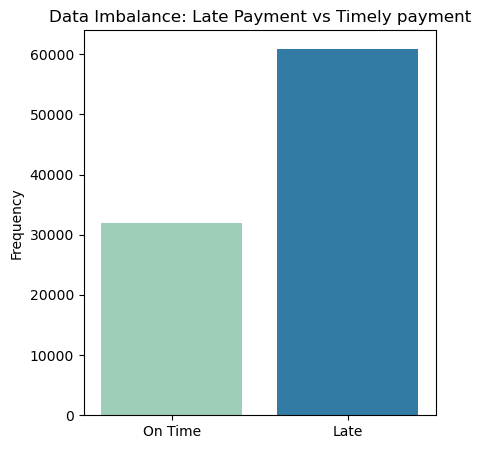

In [17]:
# ploting the default column
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='default', data=rp_data, palette="YlGnBu")

plt.title("Data Imbalance: Late Payment vs Timely payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time', 'Late'))


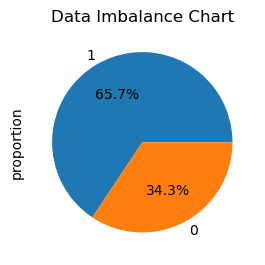

In [18]:
#pie chart
plt.subplot(1,2,2)
#data imbalance chart
(rp_data.default.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")
plt.show()

observation: we can observe a fare distribution of data for default column

# Step 3: Exploratory Data Analysis

### 1. Univariate Analysis

#### Numerical Columns

In [19]:
# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

In [20]:
# 'Local Amount' column summary
rp_data['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

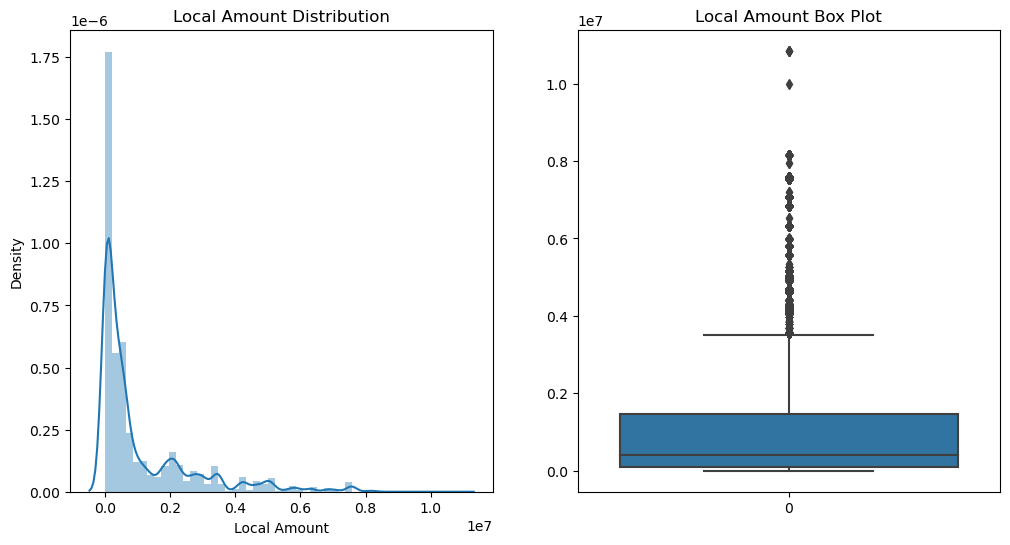

In [21]:
# Visualizing the distribution of 'Local Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rp_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rp_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

Note: Dropping the 'Local Amount' column as it does not have a single currency value and we already have 'USD Amount' column for bill amount.

In [22]:
# Dropping the 'Local Amount' column
rp_data.drop('Local Amount', axis=1, inplace=True)

# Checking the head of data
rp_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [23]:
# 'USD Amount' column summary
rp_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

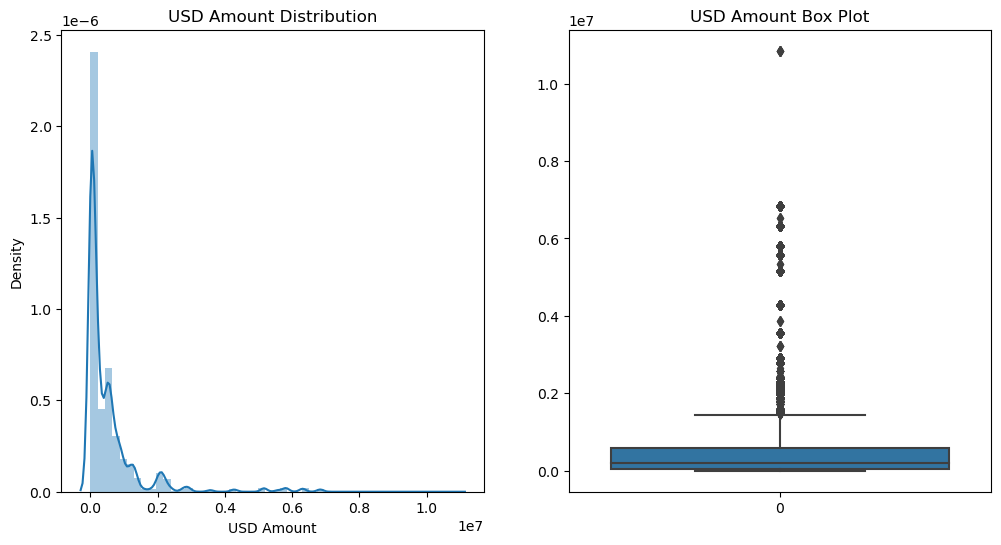

In [24]:
# Visualizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rp_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rp_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

#### Categorical Columns

In [25]:
# Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

In [26]:
# Top 10 customers on the basis total invoices
rp_data['CUSTOMER_NAME'].value_counts().head(10)

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: count, dtype: int64

In [27]:
# Checking the number of unique values in the column
rp_data['CLASS'].nunique()

1

In [28]:
# Dropping the CLASS column as it has only one value
rp_data.drop('CLASS', axis=1, inplace=True)

In [29]:
# Checking the head of data
rp_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [30]:
# Checking the number of unique values in the CURRENCY_CODE column
rp_data['CURRENCY_CODE'].nunique()

8

In [31]:
# Checking the value counts of each currency code
rp_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

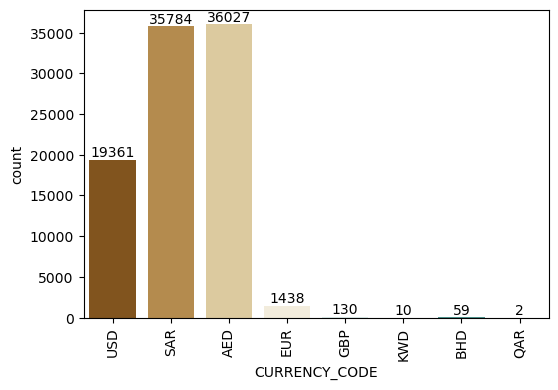

In [32]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=rp_data, x='CURRENCY_CODE', palette='BrBG')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

observation: Currency used for bill payments are mostly USD, SAR or AED.

In [33]:
 # Checking the number of unique values in the column
rp_data['PAYMENT_TERM'].nunique()

42

In [34]:
# Checking the list of unique values
rp_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [35]:
 # Checking the top 10 PAYMENT_TERM
rp_data['PAYMENT_TERM'].value_counts().head(10)

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
15 Days from EOM          7533
Immediate Payment         5468
Immediate                 4946
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: count, dtype: int64

In [36]:
# Checking the value count of each level of INVOICE_CLASS
rp_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    87313
CM      4946
DM       552
Name: count, dtype: int64

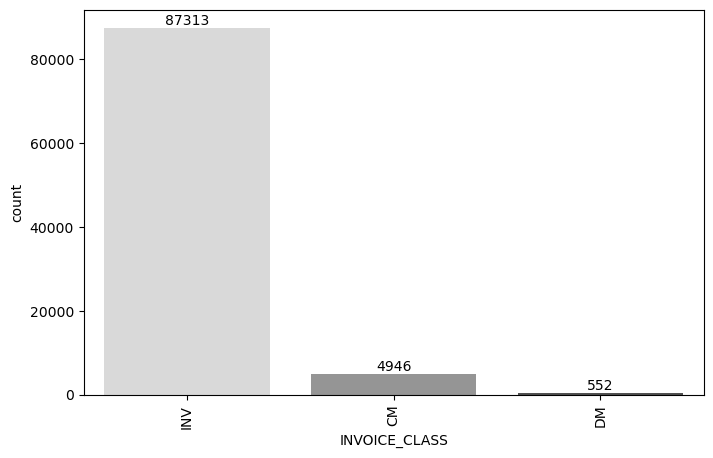

In [37]:
# Visualising the INVOICE_CLASS column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=rp_data, x='INVOICE_CLASS', palette='Greys')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

observation: INV has the maximum number of bills in INVOICE_CLASS column.

In [38]:
# Checking the number of unique values in the column
rp_data['INVOICE_CURRENCY_CODE'].nunique()

10

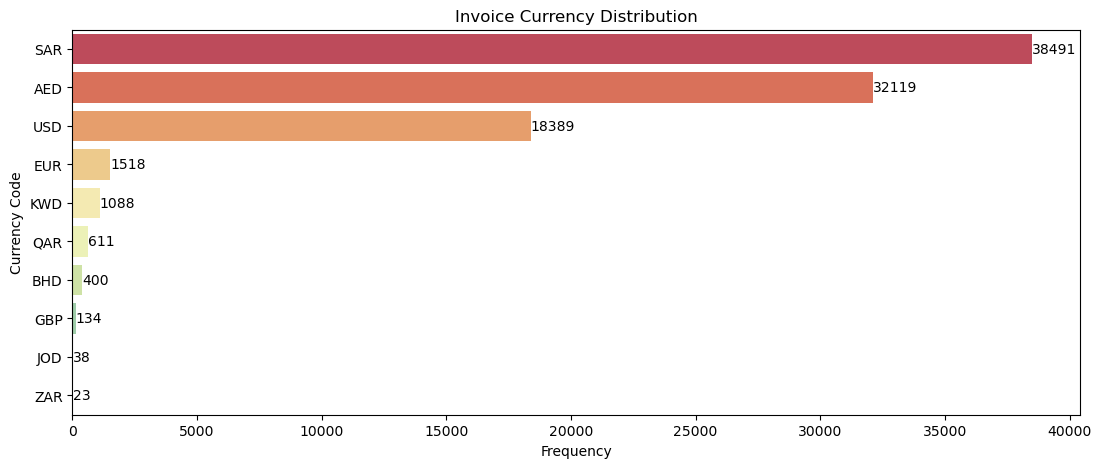

In [39]:
# Visualising the column
plt.figure(figsize=(13,5))

ax = sns.countplot(data=rp_data, y='INVOICE_CURRENCY_CODE', order=rp_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette='Spectral')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Invoice Currency Distribution")
plt.ylabel("Currency Code")
plt.xlabel("Frequency")

plt.show()

observation: The most number of invoices were generated in SAR, AED and USD currency.

In [40]:
# Checking the value count of each level of INVOICE_TYPE
rp_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66569
Non Goods    26242
Name: count, dtype: int64

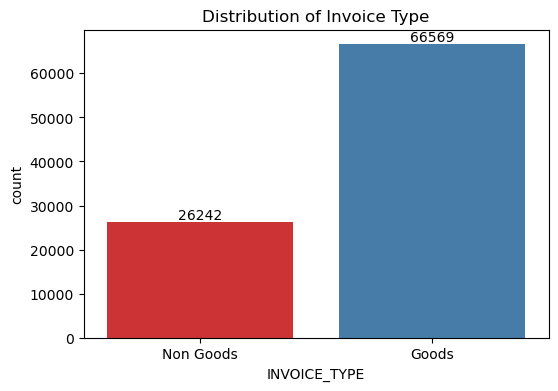

In [41]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=rp_data, x='INVOICE_TYPE', palette='Set1')

for label in ax.containers:
    ax.bar_label(label)

plt.title("Distribution of Invoice Type")
plt.show()

observation: Almost 70% of the invoices generated were for Goods products.

In [42]:
# Checking the value count of each level of RECEIPT_METHOD
rp_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

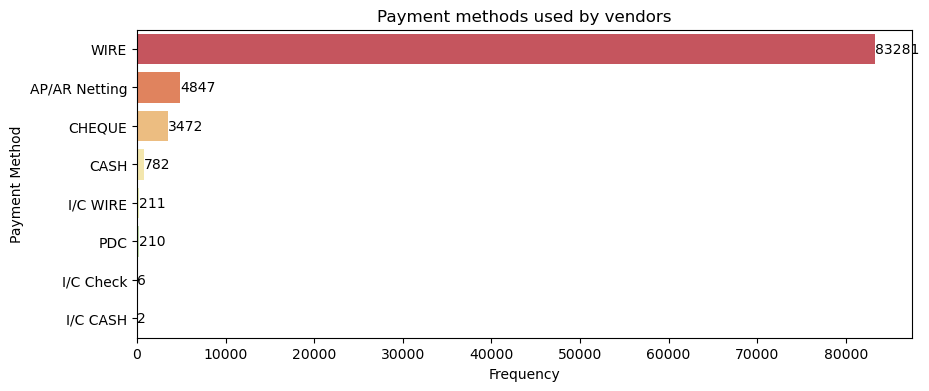

In [43]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rp_data, y='RECEIPT_METHOD', order=rp_data['RECEIPT_METHOD'].value_counts().index, palette='Spectral')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

observation: The most preferred payment method for bill payment is WIRE.

### 2. Bivariate Analysis

In [44]:
# Extracting month from the date columns

rp_data['month_reciept'] = rp_data['RECEIPT_DATE'].dt.month
rp_data['month_inv_creation'] = rp_data['INVOICE_CREATION_DATE'].dt.month
rp_data['month_due'] = rp_data['DUE_DATE'].dt.month

In [45]:
# Month-wise invoices due
orders_due_month = rp_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [46]:
# Grouping data by 'month_due' and calculating the mean of the 'default' column to find the average late payment rate
late_dues = rp_data.groupby('month_due')['default'].mean()

# Sorting the results by the 'month_due' in ascending order
late_dues = late_dues.sort_index(ascending=True)

# Displaying the resulting Series
print(late_dues)


month_due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: default, dtype: float64


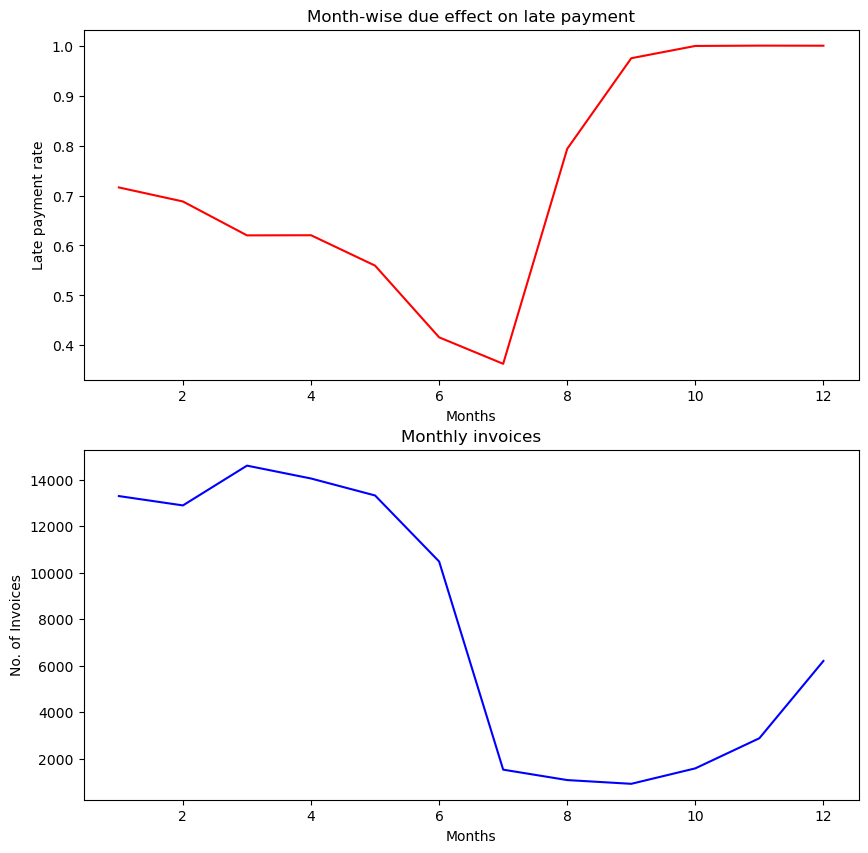

In [47]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(late_dues, color='red')
plt.title("Month-wise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_due_month, color='blue')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

observation: 
- For the 3rd month, the number of invoices is the highest and late payment rate is comparatively lower than other months with large number of invoices.

- Month 7 has the very low late payment rate, this can be because of the fact that the number of invoices is also low.

- In the 2nd half of the year, the late payment increases steeply from 7th month onwards. The number of invoices are comparatively lower than the first half of the year.

In [48]:
# Receipt_date

order_month_receipt = rp_data.groupby('month_reciept').count()['DUE_DATE']  # number of payments received in a month

# out of all the payments received in month how many were late payments
monthly_receipt = rp_data.groupby('month_due')['default'].mean()

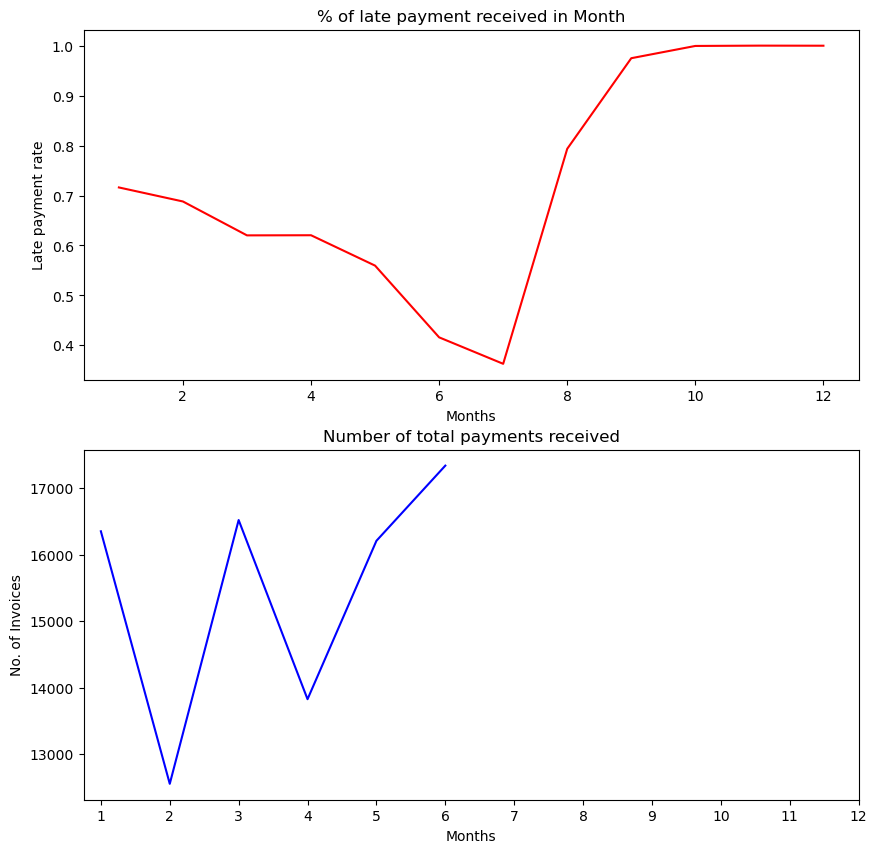

In [49]:
# Visualizing the effect of month in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_receipt, color='red')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(order_month_receipt, color='blue')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

USD Amount column

In [50]:
usd_amt_late = rp_data.pivot_table(values='USD Amount', index='default', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


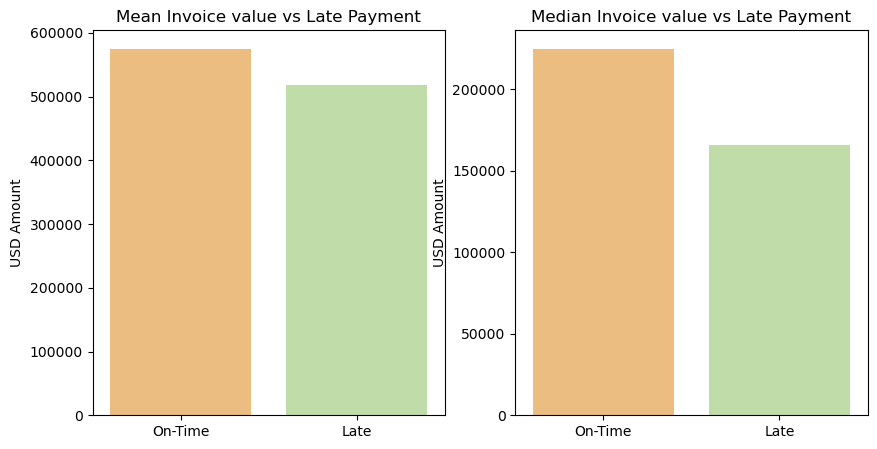

In [51]:
# Visualising the differencing between mean and median of the invoice value with respect to late payment

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

sns.barplot(data=usd_amt_late, x='default', y=('mean','USD Amount'), palette='Spectral')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_amt_late, x='default', y=('median','USD Amount'), palette='Spectral')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

observation: The mean and median of invoice value of On-time bill payment is higher than late payment.

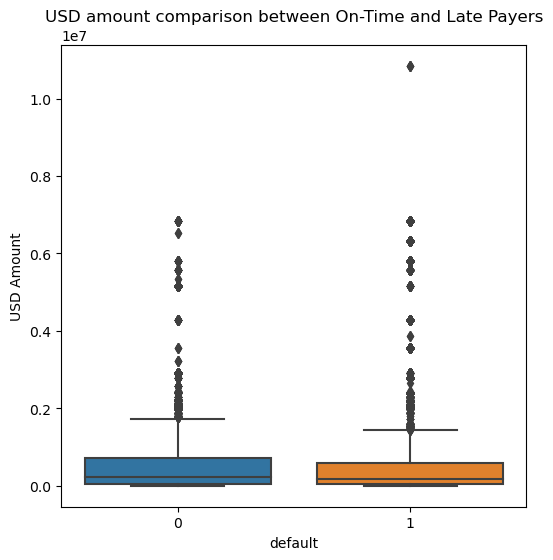

In [52]:
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='default', data = rp_data)
plt.title("USD amount comparison between On-Time and Late Payers")

plt.show()

# Step 4: Feature Engineering

In [53]:
# Using cumsum() function to get cummulative sum on value_counts()
pay_term_cumsum = rp_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [54]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

rp_data['PAYMENT_TERM'] = rp_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
rp_data['PAYMENT_TERM'] = rp_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = rp_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

observation: As it can be seen, around 95% of data is covered by 10 values, hence we will club the rest of the values to others in both datasets.

In [55]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
rp_data['PAYMENT_TERM'] = rp_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')
rp_data['PAYMENT_TERM'].value_counts() # Sanity Check

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

### Creating Dummy Variable

In [56]:
# Creating dummy variables for the 'PAYMENT_TERM' column
term_dummies= pd.get_dummies(rp_data['PAYMENT_TERM']).drop('others', axis=1).astype(int)
term_dummies

,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
93932,0,0,0,0,0,0,0,0,0,1
93933,0,0,0,0,0,0,0,0,0,1
93934,0,0,0,0,0,0,0,0,0,1
93935,0,0,0,0,0,0,1,0,0,0


In [57]:
#dropping the original column
rp_data = rp_data.join(term_dummies).drop('PAYMENT_TERM', axis=1 )
rp_data.shape #Sanity Check

(92811, 26)

In [58]:
# Creating dummy variables for the 'INVOICE_CLASS' column
class_dummies= pd.get_dummies(rp_data['INVOICE_CLASS']).astype(int)
class_dummies



,CM,DM,INV
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
93932,1,0,0
93933,1,0,0
93934,1,0,0
93935,0,0,1


In [59]:
rp_data = rp_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [60]:
rp_data.shape

(92811, 28)

In [61]:
#checking all the columns in rp_data
rp_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [62]:
rp_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,0,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,0,0,0,0,0,0,0,0,0,1


# Open Invoice Data

## Reading and understanding the data

In [63]:
# Reading the open invoice dataset
oi_data = pd.read_csv("Open_Invoice_data.csv", encoding='latin1')
oi_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [64]:
#checking dimensions of the dataframe
oi_data.shape

(88204, 14)

In [65]:
# Removing unecessary columns (that are not there in the receiced payment dataset)
# Dropping 'Transaction Number','Customer Account No' as they bear no significance for our target var.
# Dropping 'Local amount'

oi_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [66]:
# Checking the head
oi_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


## data cleaning

In [67]:
# Checking the number of missing values in each column
oi_data.isnull().sum().sort_values(ascending=False)

Customer_Name        0
Payment Term         0
Due Date             0
Transaction Class    0
AGE                  0
USD Amount           0
INV_CREATION_DATE    0
dtype: int64

In [68]:
# checking the type of each column
oi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [69]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to pandas datetime
oi_data['Due Date'] = pd.to_datetime(oi_data['Due Date'])
oi_data['INV_CREATION_DATE'] = pd.to_datetime(oi_data['INV_CREATION_DATE'])

In [70]:
# Checking the head
oi_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,2021-12-21,CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,"2,000",2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,INVOICE,-18,"2,000",2022-03-24 17:46:00
3,AL R Corp,15 Days from Inv Date,2022-01-19,INVOICE,76,"2,415",2022-01-05 11:49:00
4,ALLI Corp,30 Days from EOM,2022-04-30,INVOICE,-25,"3,800",2022-03-03 22:30:00


Note: datatype of USD Amount is object, changing its datatype to integer

In [71]:
# Changing the datatype of USD Amount
oi_data['USD Amount'] = oi_data['USD Amount'].apply(lambda x: x.replace(",", ""))
oi_data['USD Amount'] = oi_data['USD Amount'].astype(int)

In [72]:
# checking the type of each column again
oi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      88204 non-null  object        
 1   Payment Term       88204 non-null  object        
 2   Due Date           88204 non-null  datetime64[ns]
 3   Transaction Class  88204 non-null  object        
 4   AGE                88204 non-null  int64         
 5   USD Amount         88204 non-null  int32         
 6   INV_CREATION_DATE  88204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.4+ MB


Note: There are negative values present in the column, hence it is safe to remove negative(-) and 0 values.

In [73]:
# Keeping the values above 0 for USD Amount column
oi_data = oi_data[oi_data['USD Amount']>0]

In [74]:
# Checking the USD Amount column again
oi_data['USD Amount']

1         2000
2         2000
3         2415
4         3800
5         1264
         ...  
88197     1199
88198      914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 79516, dtype: int32

## Feature Engineering

In [75]:
# Keeping the same levels as done in recieved payment dataset
oi_data['Payment Term'] = oi_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')
oi_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [76]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(oi_data['Payment Term']).drop('others', axis=1).astype(int)
term_dummies_open

,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
88197,0,0,0,0,0,0,0,0,0,0
88198,0,0,0,0,0,0,0,0,0,0
88201,0,1,0,0,0,0,0,0,0,0
88202,0,0,0,0,0,0,1,0,0,0


In [77]:
# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
oi_data = oi_data.join(term_dummies_open).drop('Payment Term', axis=1)
oi_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [78]:
# Checking the levels in the column
oi_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [79]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
oi_data['Transaction Class'] = oi_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [80]:
# Creating dummy variables for the column
tc = pd.get_dummies(oi_data['Transaction Class']).astype(int)
tc

,DM,INV
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
88197,0,1
88198,0,1
88201,0,1
88202,0,1


In [81]:
# Adding the dummy variables to main dataset and dropping the Transaction Class column
oi_data = oi_data.join(tc).drop('Transaction Class', axis=1)
oi_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1


In [82]:
# Adding 'CM' level to the open_data dataset same as received payment data
oi_data['CM'] = 0

In [83]:
# Checking the head of the data
oi_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [84]:
#checking all columns in oi_data
oi_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

# Step 5: Customer Segmentation

Requirement: Customer-level attributes could also be important independent variables to be included in the model. A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on two derived variables: the average payment time in days for a customer and the standard deviation for the payment time. Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable for the ML model.

In [85]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
rp_data['act_days_for_pay'] = (rp_data['RECEIPT_DATE']-rp_data['INVOICE_CREATION_DATE']).dt.days

In [86]:
rp_data['act_days_for_pay'].head()

0    169
1     33
2      1
3     47
4     47
Name: act_days_for_pay, dtype: int64

In [87]:
# Calculating customer wise average days for payment
cust_seg1= rp_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [88]:
# Calculating the standard deviation for customer wise payment days
cust_seg2 = rp_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [89]:
# Merging the above two dataframes
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')


In [90]:
# Checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


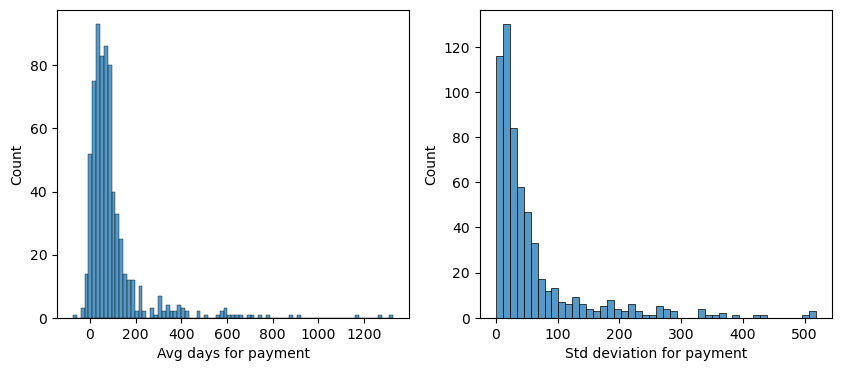

In [91]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

observation: data is normalized,therefore no further requirement of scaling

In [92]:
#importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

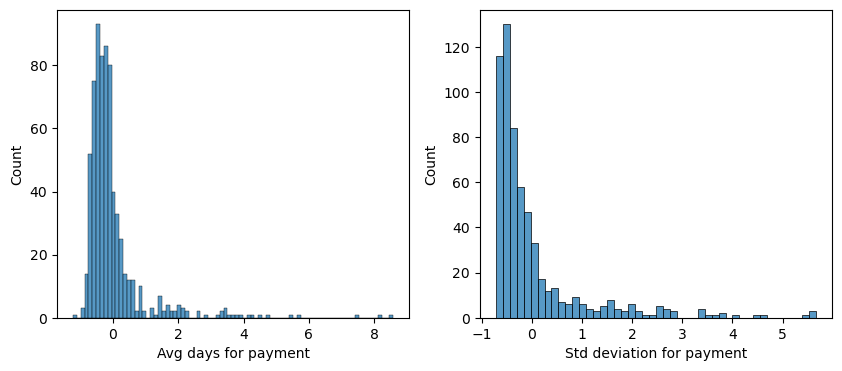

In [93]:
# Visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

In [94]:
# resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [95]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [96]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


## clustering

In [97]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


In [98]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [99]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[-0.28920673, -0.32218085],
       [ 1.83174854,  3.4610095 ],
       [ 4.66736808,  0.44512922],
       [ 0.46060983,  1.06473075]])

### Finding optimal number of clusters

In [100]:
# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.73503646233166
For n_clusters=4, the silhouette score is 0.6221061000293573
For n_clusters=5, the silhouette score is 0.6209288452882942
For n_clusters=6, the silhouette score is 0.40202734632910386
For n_clusters=7, the silhouette score is 0.40769666969629087
For n_clusters=8, the silhouette score is 0.413349837326171


observation: From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [101]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [103]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [104]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,1
1,6TH Corp,-0.420640,-0.626042,1
2,A3 D Corp,-0.387513,-0.075683,1
3,ABC Corp,-0.593276,-0.724119,1
4,ABDU Corp,-0.167009,-0.046851,1


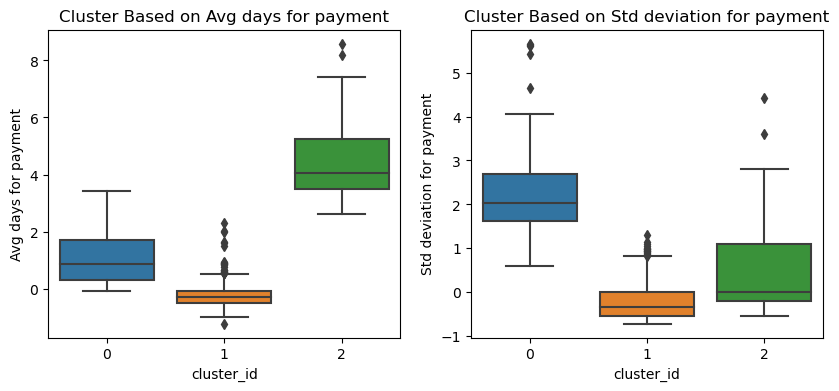

In [105]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

In [106]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [107]:
# Creating a copy
cust_dict = cust_seg.copy()

In [108]:
# Renaming the column
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [109]:
# Setting the 'Customer_Name' as index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

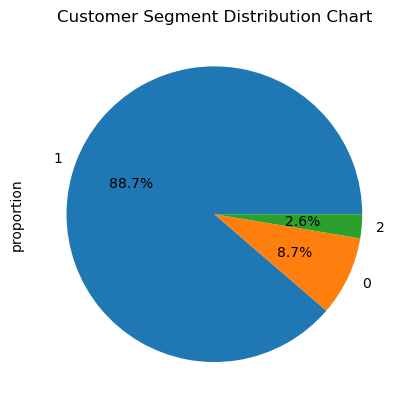

In [110]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")

observation:

'1' Cluster -- Early Invoice Payment

'2' Cluster -- Prolonged Invoice Payment

'0' Cluster -- Medium Invoice Payment

- From the above we can see that Early customers comprise of 88.7% of customers whereas medium and prolonged payers are 11.3% in total

In [111]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(rp_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.630400,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,1
1,WIRE,C EA Corp,37403,2021-05-19,AED,2859.090000,1.2721E+11,2021-04-07,2021-05-30,AED,...,0,0,0,0,0,0,0,1,42,1
2,WIRE,C EA Corp,37403,2021-02-20,AED,10.578625,2.412E+11,2020-11-26,2020-12-26,AED,...,0,0,0,0,0,0,0,1,86,1
3,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.211330,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.609710,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,1


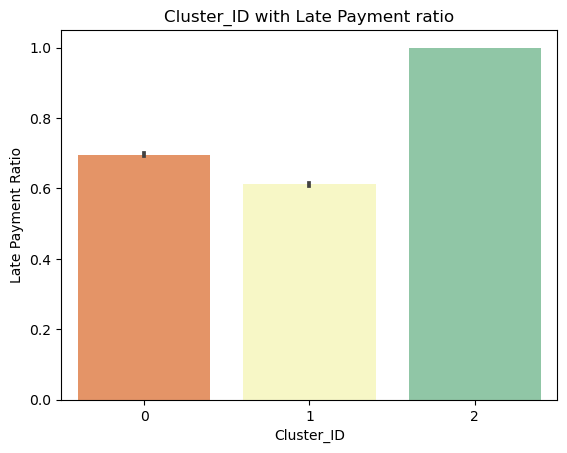

In [112]:
sns.barplot(data=merged_df, x='cluster_id', y='default', estimator=np.mean, palette='Spectral')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [113]:
#checking all the columns of the data set
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

# Step 6: Data Preparation for Model building

In [114]:
# Creating a new dataframe with important variables for model building
model_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
model_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.630400,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2859.090000,2021-04-07,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,10.578625,2020-11-26,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,48990.211330,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,41991.609710,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [115]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
model_df['Invoice_Month'] = model_df['INVOICE_CREATION_DATE'].dt.month
model_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
model_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


In [116]:
model_df.shape

(92811, 16)

In [117]:
# Open Invoice dataset
oimodel_df = oi_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
oimodel_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25


In [118]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
oimodel_df['Invoice_Month'] = oimodel_df['INV_CREATION_DATE'].dt.month
oimodel_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
oimodel_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3


In [119]:
# Creating Due_Month column and dropping Due Date
oimodel_df['Due_Month'] = oimodel_df['Due Date'].dt.month
oimodel_df.drop('Due Date',axis=1,inplace= True)
oimodel_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


### Train- Test Split

In [120]:
# Feature variables X
X = model_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


In [121]:
# Target variable y
y = merged_df['default']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: default, dtype: int32

In [122]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,571661.900,0,0,1,0,0,0,0,0,0,0,0,1,0,1,10
29115,1157180.634,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
80920,148278.340,0,0,0,0,0,0,0,0,1,0,0,1,0,1,10
55019,490129.340,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
82266,45541.580,0,0,0,0,0,0,1,0,0,0,0,1,0,1,10


### feature scaling

In [123]:
X_train.shape

(64967, 16)

In [124]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,0.038683,0,0,1,0,0,0,0,0,0,0,0,1,0,1,10
29115,0.655995,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
80920,-0.407691,0,0,0,0,0,0,0,0,1,0,0,1,0,1,10
55019,-0.047277,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
82266,-0.516006,0,0,0,0,0,0,1,0,0,0,0,1,0,1,10


In [125]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
count,6.496700e+04,64967.00000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,1.055419e-17,0.08138,0.122324,0.150815,0.041236,0.038373,0.135761,0.212092,0.041529,0.023874,0.111641,0.005895,0.941047,0.053058,0.474195,5.465867
std,1.000008e+00,0.27342,0.327662,0.357871,0.198838,0.192097,0.342537,0.408793,0.199511,0.152657,0.314927,0.076555,0.235539,0.224150,0.503145,4.076222
min,-5.640180e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.219380e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,-3.628973e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,6.815221e-02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000
max,1.087496e+01,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


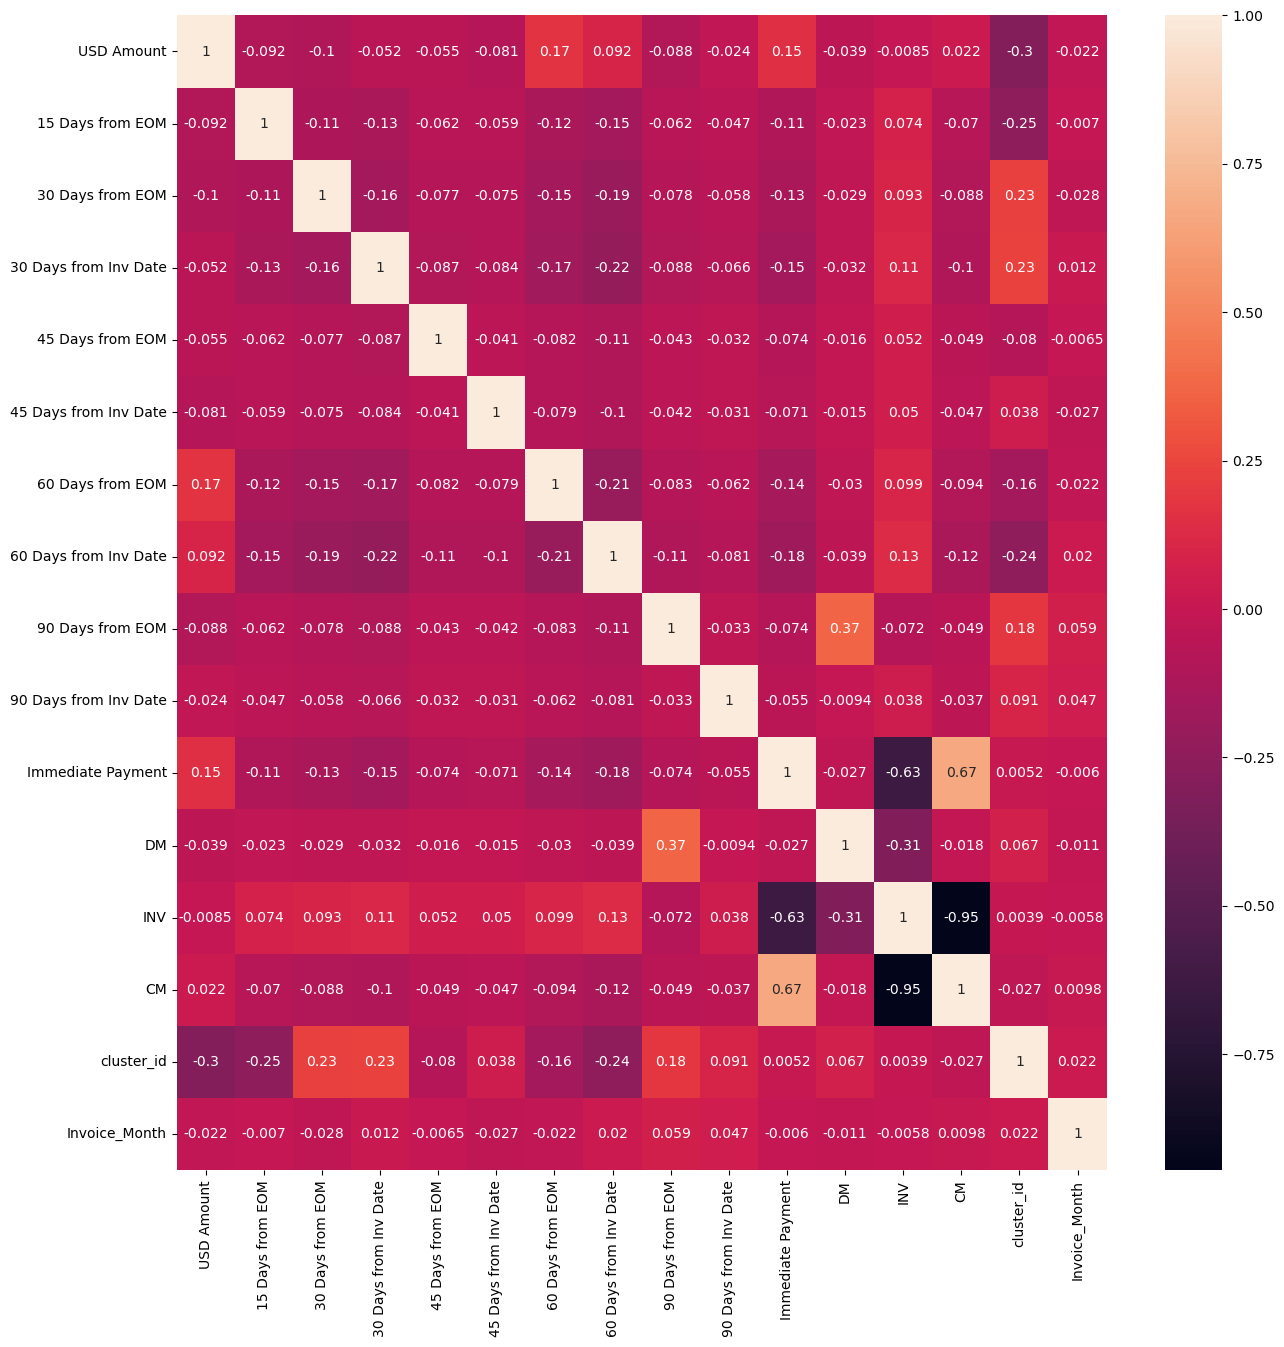

In [126]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

Note: CM & INV, INV & Immediate Payment, DM & 90 days from EOM has high multicollinearity, hence dropping these columns.

In [127]:
X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

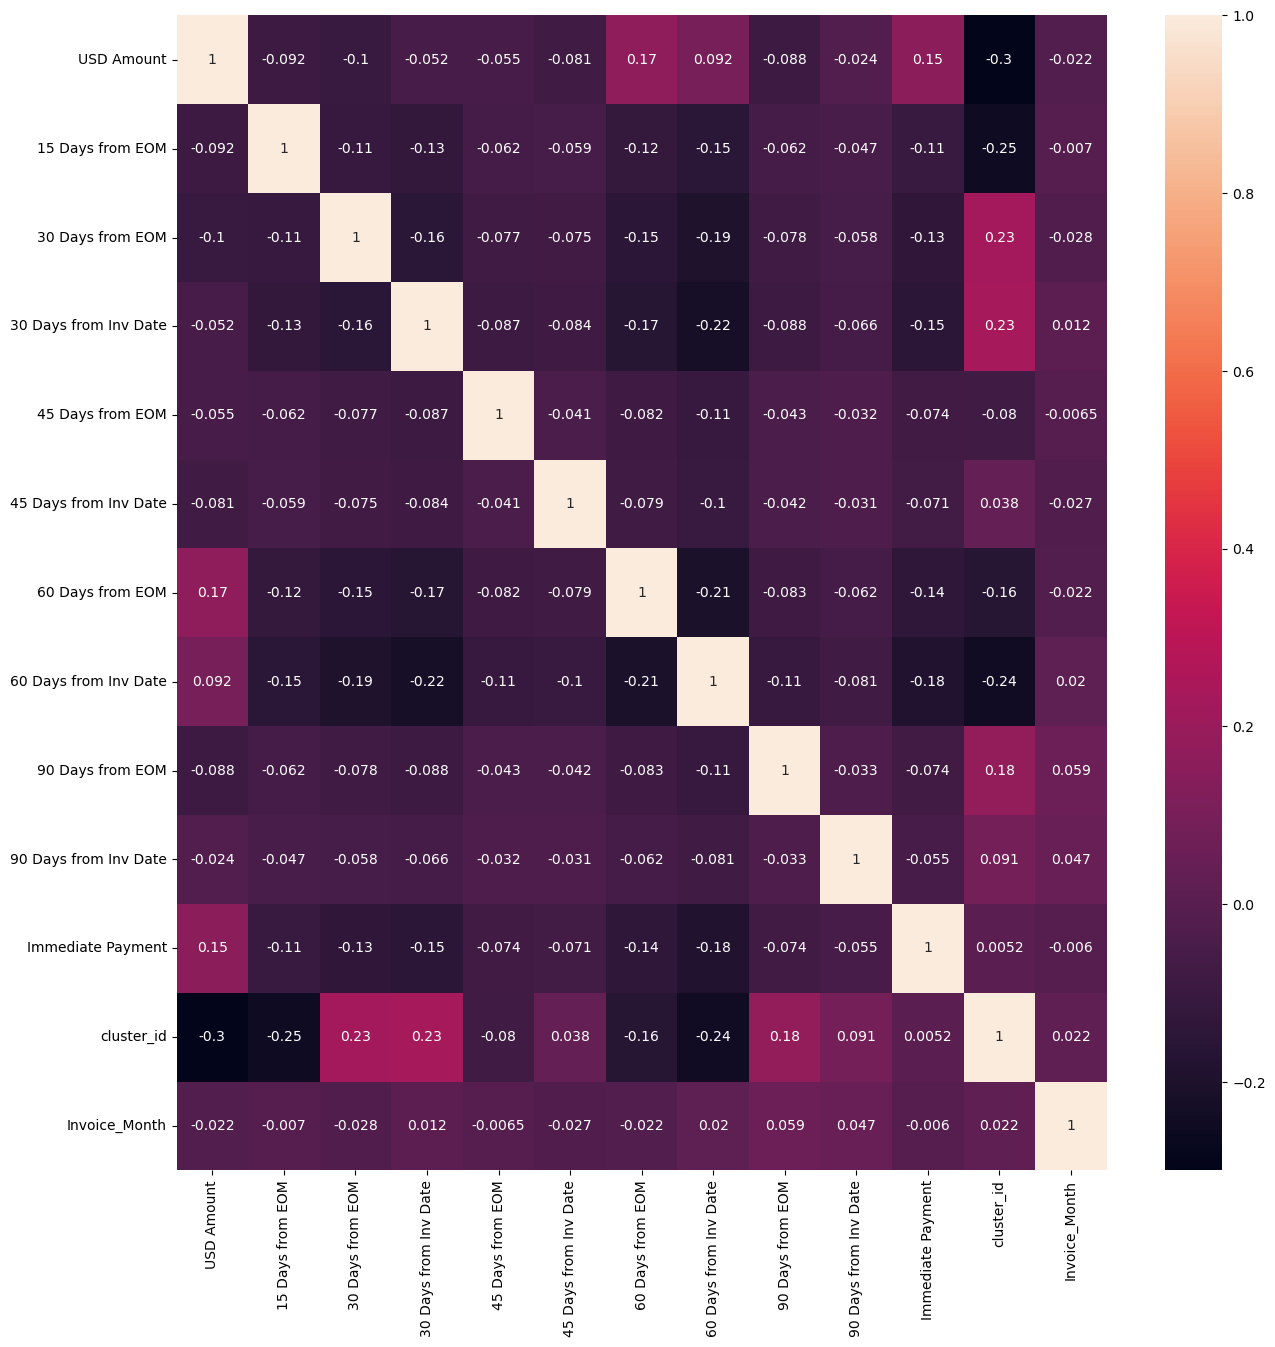

In [128]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Step 7: Model Building

##  logistic regression

In [129]:
# Importing required library for building logistic regression model
import statsmodels.api as sm

### model 1 

In [130]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30226.
Date:                Tue, 10 Sep 2024   Deviance:                       60452.
Time:                        15:09:56   Pearson chi2:                 6.34e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3005
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7617      0.049     15.443      0.000       0.665       0.858
USD Amount               -0.1097      0.012     -9.107      0.000      -0.133      -0.086
15 Days from EOM          2.6445      0.109     24.308      0.000       2.431       2.858
30 Days from EOM         -2.2466      0.052    -42.999      0.000      -2.349      -2.144
30 Days from Inv Date     0.2479      0.051      4.819      0.000       0.147       0.349
45 Days from EOM          0.3888      0.069      5.627      0.000       0.253       0.524
45 Days from Inv Date    -0.3241      0.063     -5.172      0.000      -0.447      -0.201
60 Days from EOM         -2.2219      0.053    -41.894      0.000      -2.326      -2.118
60 Days from Inv Date    -0.2739      0.050     -5.439      0.000      -0.373      -0.175
90 Days from EOM         -0.4760      0.061     -7.756      0.000      -0.596      -0.356
90 Days from Inv Date    -0.9885      0.069    -14.322      0.000      -1.124      -0.853
Immediate Payment         3.1197      0.105     29.613      0.000       2.913       3.326
cluster_id               -0.2766      0.024    -11.556      0.000      -0.323      -0.230
Invoice_Month             0.0957      0.003     37.809      0.000       0.091       0.101
=========================================================================================
"""

### checking VIF

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Invoice_Month,2.68
11,cluster_id,2.56
3,30 Days from Inv Date,1.65
2,30 Days from EOM,1.51
7,60 Days from Inv Date,1.45
10,Immediate Payment,1.36
6,60 Days from EOM,1.30
8,90 Days from EOM,1.25
0,USD Amount,1.20
1,15 Days from EOM,1.14


observation: Both the p-value and VIF are in acceptable range, hence going ahead with this model.

In [132]:
# Predicted values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

52625    0.843640
29115    0.192096
80920    0.622009
55019    0.400707
82266    0.772872
16093    0.977289
54916    0.697179
15532    0.989681
2618     0.781452
79771    0.800989
dtype: float64

In [133]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84363956, 0.1920957 , 0.62200865, 0.40070654, 0.7728718 ,
       0.9772887 , 0.69717853, 0.98968133, 0.78145248, 0.8009892 ])

In [134]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head()

,default,default_pred
0,1,0.843640
1,0,0.192096
2,1,0.622009
3,1,0.400707
4,1,0.772872


In [135]:
# Making the prediction based on 0.5 cutoff
y_pred['lr_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,default,default_pred,lr_pred
0,1,0.843640,1
1,0,0.192096,0
2,1,0.622009,1
3,1,0.400707,0
4,1,0.772872,1


In [136]:
#importing libraries 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [137]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.default, y_pred.lr_pred)
confusion

array([[12821,  9555],
       [ 4526, 38065]], dtype=int64)

In [138]:
# Accuracy
print(accuracy_score(y_pred.default, y_pred.lr_pred))

0.7832591931288192


accuracy is 78.3% for train data


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.893733417858233

senstivity is 89.3%

In [141]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5729799785484447

### Finding the optimal cutoff point

In [142]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,lr_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.843640,1,1,1,1,1,1,1,1,1,0
1,0,0.192096,0,1,0,0,0,0,0,0,0,0
2,1,0.622009,1,1,1,1,1,1,1,0,0,0
3,1,0.400707,0,1,1,1,1,0,0,0,0,0
4,1,0.772872,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64962,1,0.990100,1,1,1,1,1,1,1,1,1,1
64963,1,0.527460,1,1,1,1,1,1,0,0,0,0
64964,1,0.658086,1,1,1,1,1,1,1,0,0,0
64965,0,0.195048,0,1,0,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655579  1.000000  0.000000
0.2   0.2  0.701618  0.972952  0.185154
0.3   0.3  0.775548  0.949168  0.445075
0.4   0.4  0.775809  0.910498  0.519440
0.5   0.5  0.783259  0.893733  0.572980
0.6   0.6  0.774470  0.859501  0.612621
0.7   0.7  0.717687  0.683783  0.782222
0.8   0.8  0.645143  0.496607  0.927869
0.9   0.9  0.540767  0.305769  0.988068


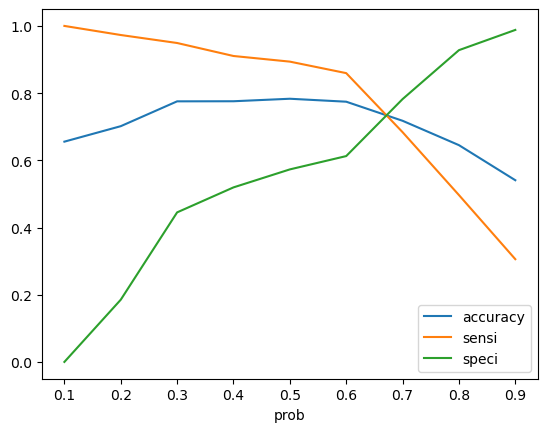

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [145]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,default,default_pred,lr_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,1,0.843640,1,1,1,1,1,1,1,1,1,0,1
1,0,0.192096,0,1,0,0,0,0,0,0,0,0,0
2,1,0.622009,1,1,1,1,1,1,1,0,0,0,1
3,1,0.400707,0,1,1,1,1,0,0,0,0,0,0
4,1,0.772872,1,1,1,1,1,1,1,1,0,0,1


In [146]:
# Let's check the overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7744701155971493

In [147]:
# Precision Score
precision_score(y_pred.default, y_pred.final_predicted)

0.8085477636664826

In [148]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8595008335094269

In [149]:
#importing libraries
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)

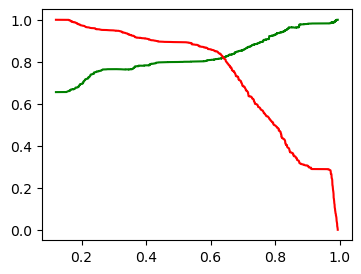

In [150]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

### Plotting the ROC curve

In [151]:
from sklearn.metrics import roc_auc_score,roc_curve

In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

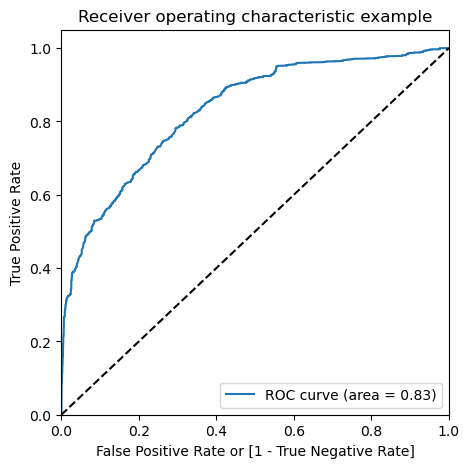

In [154]:
draw_roc(y_pred.default,y_pred.default_pred)

observation: AUC = 0.83 represents a good working model

### Making predictions on the test set

In [155]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,cluster_id,Invoice_Month
12743,-0.282967,0,0,0,0,0,0,0,0,0,1,0,12
75338,-0.543059,0,1,0,0,0,0,0,0,0,0,1,1
39614,0.811935,0,0,0,0,0,0,1,0,0,0,0,4
52529,0.038683,0,0,0,0,0,0,0,0,1,0,1,10
47001,-0.383619,0,1,0,0,0,0,0,0,0,0,1,4


In [156]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

12743    0.993698
75338    0.167108
39614    0.685995
52529    0.610431
47001    0.208049
90315    0.588503
28144    0.651386
29929    0.203375
80190    0.708781
1736     0.886735
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

,default,CustID
12743,1,12743
75338,1,75338
39614,1,39614
52529,1,52529
47001,0,47001


In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,default,CustID,0
0,1,12743,0.993698
1,1,75338,0.167108
2,1,39614,0.685995
3,1,52529,0.610431
4,0,47001,0.208049


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob','target':'Delay'})
# Let's see the head of y_pred_final
y_pred_final.head()

,default,CustID,Delay_Prob
0,1,12743,0.993698
1,1,75338,0.167108
2,1,39614,0.685995
3,1,52529,0.610431
4,0,47001,0.208049


In [160]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)
y_pred_final.head()

,default,CustID,Delay_Prob,final_predicted
0,1,12743,0.993698,1
1,1,75338,0.167108,0
2,1,39614,0.685995,1
3,1,52529,0.610431,1
4,0,47001,0.208049,0


In [161]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.7764329837667002

In [162]:
#precision score
precision_score(y_pred_final.default, y_pred_final.final_predicted)

0.8110591980284438

In [163]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8595008335094269

accuracy is almost 78% for both train and test data

## Random Forest

In [164]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [165]:
model_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [166]:
# creating X and y
X= model_df
y= merged_df['default']

In [167]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [169]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [170]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22376
           1       0.95      0.99      0.97     42591

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.957563070481937


In [172]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=3, scoring= 'recall', n_jobs=-1)

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.952149515155784
Standard deviation: 0.0007144760186285026


In [173]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [174]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9502
           1       0.93      0.96      0.94     18342

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844

Accuracy is :  0.9237896853900301


### Hyperparameter Tuning

In [175]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=3, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best f1 score: 0.9288022982714326
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     22376
           1       0.93      0.97      0.95     42591

    accuracy                           0.93     64967
   macro avg       0.94      0.91      0.92     64967
weighted avg       0.93      0.93      0.93     64967



In [176]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      9502
           1       0.91      0.96      0.93     18342

    accuracy                           0.91     27844
   macro avg       0.91      0.89      0.90     27844
weighted avg       0.91      0.91      0.91     27844



observations: From the above classification report, it can be seen that the f1-score for train and test set is 0.97 and 0.96, which implies that this is a good model. Hence moving forward with this as final model for prediction.

### Checking feature importance

In [177]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.369)
2. 60 Days from EOM (0.143)
3. Invoice_Month (0.138)
4. 30 Days from EOM (0.129)
5. cluster_id (0.059)
6. Immediate Payment (0.053)
7. 15 Days from EOM (0.039)
8. 30 Days from Inv Date (0.016)
9. 60 Days from Inv Date (0.013)
10. 90 Days from Inv Date (0.010)
11. 90 Days from EOM (0.008)
12. INV (0.007)
13. 45 Days from EOM (0.005)
14. CM (0.005)
15. 45 Days from Inv Date (0.004)
16. DM (0.001)


# Step 8: Preparing Open Invoice dataset for prediction

Recommendation: You may notice that the open invoice data has a column 'AGE'. The age is calculated by taking the difference between Transaction Date and AS_OF_DATE (refer to the data dictionary if required). This means that a positive value in the AGE column clearly indicates that the payment is already overdue. So, there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed. Hence, your model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [178]:
# Selecting rows with negative age value for prediction
open_reg_df_age = oi_data[oi_data['AGE'] < 0]
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [179]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')

In [180]:
# Null counts
round(open_reg_df_age.isna().sum()/len(open_reg_df_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
CM                       0.0000
cluster_id               0.0274
dtype: float64

Note: cluster_id has 2.7 % null value counts, hence removing the null values for better model prediction as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [181]:
# Dropping the rows containing null values
open_reg_df_age.dropna(axis=0, inplace=True)
open_reg_df_age.shape

(27247, 19)

In [182]:
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0


In [183]:
open_reg_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  int32         
 6   30 Days from EOM       27247 non-null  int32         
 7   30 Days from Inv Date  27247 non-null  int32         
 8   45 Days from EOM       27247 non-null  int32         
 9   45 Days from Inv Date  27247 non-null  int32         
 10  60 Days from EOM       27247 non-null  int32         
 11  60 Days from Inv Date  27247 non-null  int32         
 12  90 Days from EOM       27247 non-null  int32         
 13  90 Day

In [184]:
# converting the cluster_id column to int
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [185]:
# Checking the head after adding 'cluster_id' column
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [186]:
# Creating a copy of open_reg_df_age for final prediction
open_reg_df_final = open_reg_df_age.copy()

In [187]:
# Dropping Customer_Name and AGE column
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [188]:
# Extracting Month
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month 

In [189]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [190]:
# Checking the columns in the dataset
open_reg_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

# step 9: Final Prediction based on Random Forest model

In [191]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

array([0.84354005, 0.53450726, 0.41895156, ..., 0.66772691, 0.77417659,
       0.38980672])

In [192]:
# Adding the predicted values to the dataframe
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.843540
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.534507
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.418952
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.033994
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.866926


In [198]:
# Taking 0.6 as cut off value
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)


In [199]:
# Let us check our final dataframe with predictions
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.843540,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.534507,0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.418952,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.033994,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.866926,1


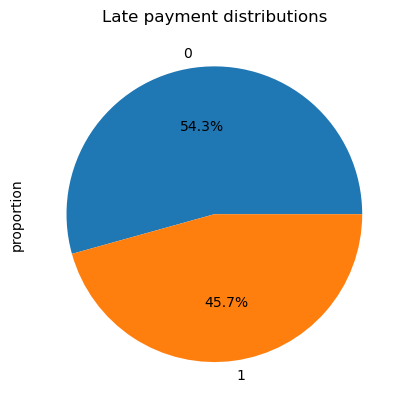

In [200]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

observation: From the above pie chart, we can observe that 54.3% payments in the open invoice data with AGE value negative(indicating due date not crossed)

In [201]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [202]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [203]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [204]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [205]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [206]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4780,8260,57.87
FITR Corp,721,3454,20.87
PARF Corp,942,1717,54.86
AREE Corp,885,1117,79.23
ALLI Corp,179,1042,17.18
...,...,...,...
SULT Corp,0,1,0.00
AG L Corp,1,1,100.00
SONO Corp,0,1,0.00


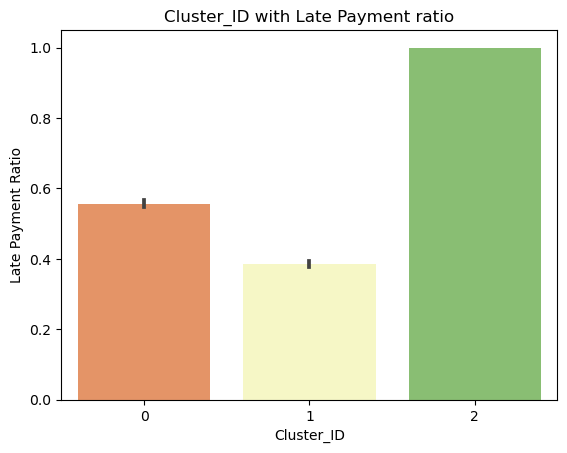

In [207]:
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 2 has significantly higher ratio of default than clusters 0 and 1

In [208]:
# top 10 customers with highest delay rates
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) 

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
ALSU Corp,7,7,100.0
SUND Corp,4,4,100.0
LVMH Corp,4,4,100.0
TRAF Corp,3,3,100.0
AMAT Corp,3,3,100.0
VENI Corp,3,3,100.0
MILK Corp,3,3,100.0
MAYC Corp,3,3,100.0
VIRT Corp,3,3,100.0


# Recommendations


- Credit Note Payments observe the greatest delay rate compared to Debit Note or Invoice type invoice classes, hence company policies on payment collection could be made stricter around such invoice classes
- Goods type invoices had significantly greater payment delay rates than non-goods types and hence can be subjected to stricter payment policies
- Since lower value payments comprise of the majority of the transactions, also late payments are seen more on lower value payments, it is recommended to focus more on those. The company can apply penalties depending on billing amount, the lesser the bill, the greater the percentage of penalty on late payments. Ofcourse this has to be last resort
- Customer segments were clustered into three categories, viz., 0,2 and 1 which mean medium, prolonged and early payment duration respectively. It was found that customers in cluster 2 (prolonged days) had significantly greater delay rates than early and medium days of payment, hence cluster 2 customers should be paid extensive focus
- The following companies with the greatest probability and total & delayed payment counts should be first priority and should be focused on more due to such high probability rates 
ALSU Corp,
SUND Corp,	
LVMH Corp,	
TRAF Corp,
AMAT Corp,	
VENI Corp,	
MILK Corp,	
MAYC Corp,	
VIRT Corp,	
ROVE Corp	